### 1. Project Title & Objective

# Fraud Detection System for Financial Transactions 
This project aims to detect fraudulent transactions using Machine Learning. We use data preprocessing, balancing, model training, evaluation, and a Streamlit web app to simulate real-time fraud detection.

### 2.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

### 3.Load & Explore Data

In [2]:
df = pd.read_csv('creditcard.csv') 
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Data Summary:
- No missing values 
- Imbalanced target variable 


### 4. Data Preprocessing

In [3]:
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### 5. Handle Class Imbalance using SMOTE

In [4]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Why SMOTE?
SMOTE (Synthetic Minority Oversampling Technique) balances the dataset by generating synthetic samples of the minority class (fraud) instead of duplicating.


### 6. Feature Scaling

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

### 7. Model Training & Evaluation (Logistic Regression)

In [6]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_scaled, y_train_smote)
y_pred = model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85295
           1       0.15      0.85      0.25       148

    accuracy                           0.99     85443
   macro avg       0.57      0.92      0.62     85443
weighted avg       1.00      0.99      0.99     85443

Confusion Matrix:
 [[84574   721]
 [   22   126]]
F1 Score: 0.25326633165829143
ROC AUC Score: 0.9665266650084048


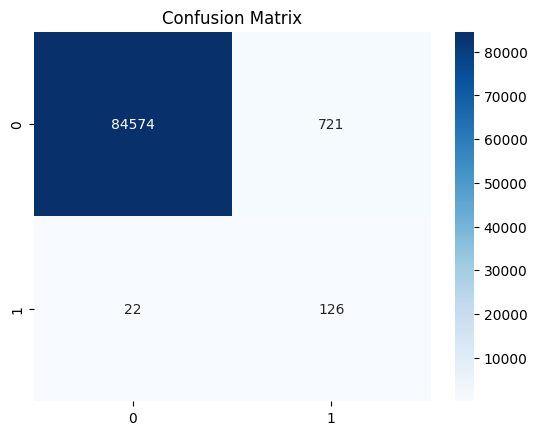

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

### 8. Model Interpretation
### Model Insights
- Logistic Regression chosen for its simplicity and interpretability.
- Balanced F1 Score & ROC AUC show good model performance.
- Confusion Matrix shows fewer false positives/negatives.


### Save Model for Deployment

In [12]:
from sklearn.linear_model import LogisticRegression
import joblib

# After training
joblib.dump(model, 'fraud_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

print(" Saved fraud_model.pkl and scaler.pkl")

 Saved fraud_model.pkl and scaler.pkl


## Project Summary

##  Final Thoughts:
- Built a complete fraud detection system end-to-end.
- Applied data balancing (SMOTE), feature scaling, logistic regression, and performance evaluation.
- Developed a real-time prediction app using Streamlit.
- Ready for deployment and future enhancement using XGBoost, LIME, or SHAP for model explainability.
